# Introduction

### CMPINF 0010 Final Project 

#### Group 40

By Daphne Giffin, Jack Cetani, and Morgan Engel

### Which neighborhood in Pittsburgh is the best for kids?

Our goal is to use three Pittsburgh data sets to determine the best neighborhood in Pittsburgh for kids. We will be using the parks, education, and police incident data sets. Using these metrics we can determine an overall score for each neighborhood, as well as the best one for kid

#  Crime by Neighborhood

#### By Jack Cetani

Dataset: [Police Incident Blotter (30 Day)](https://data.wprdc.org/dataset/police-incident-blotter)

As a group, we will be attempting to determine the best Pittsburgh neighborhood for kids using three metrics: parks, schools, and crime.

In this notebook, Pittsburgh police incident data will be analyzed to come to a conclusion on the safety of each Pittsburgh neighborhood. With this conclusion, we can find which neighborhoods are safer for children and use it in our overall metric.

In [14]:
# import pandas and geopandas
import pandas as pd
import geopandas as gpd

In [15]:
# read neighborhood shape file
neighborhood_map = gpd.read_file("Neighborhoods.shp")

In [17]:
# read dataset
incident_data = pd.read_csv("police_incidents.csv")
incident_data.head(5)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,306530435,23035798,6,2023-03-10T11:30:00,"600 Block Penn Ave Pittsburgh, PA 15222",N,Central Business District,2,THEFT,3921 Theft by Unlawful Taking or Disposition.,201.0,6.0,6.0,-80.001793,40.442593
1,307051774,23038735,10,2023-03-16T09:35:00,"800 Block Reunion Pl Pittsburgh, PA 15219",N,Bedford Dwellings,2,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a) Harassment.,509.0,NaN,NaN,NaN,NaN
2,307082554,23038816,27,2023-03-16T12:45:00,"N Braddock Ave & Alsace Way Pittsburgh, PA 15208",N,Homewood South,5,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1303.0,9.0,2.0,-79.891415,40.452384
3,307106971,23038916,99,2023-03-16T12:00:00,"1400 Block Locust St Pittsburgh, PA 15219",N,Bluff,2,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),103.0,6.0,3.0,-79.985459,40.436044
4,307112015,23038967,6,2023-03-16T17:54:00,"900 Block Liberty Ave Pittsburgh, PA 15222",N,North Oakland,2,RETSIL THEFT (SHOPLIFTING),"3929(a)(1) Retail Theft; takes possession of, ...",403.0,6.0,6.0,-79.997939,40.442945


In order to find the neighborhood with the least crime from this dataset, we could use the columns "HEIRARCHY" and "INCIDENTNEIGHBORHOOD". By figuring out the average crime heirarchy for each neighborhood, we can get an idea of how safe each neighborhood would be for kids.

In [18]:
# creating a dictionary containing the mean crime heirarchy for each neighborhood
heirarchy_dictionary = incident_data.groupby("INCIDENTNEIGHBORHOOD").mean()["HIERARCHY"]
heirarchy_dictionary.sort_values(ascending=True)

INCIDENTNEIGHBORHOOD
New Homestead            0.000000
Regent Square            0.000000
Esplen                   0.000000
East Carnegie            0.000000
Outside State            2.000000
                          ...    
Mount Oliver            43.000000
Chateau                 46.709677
Polish Hill             47.400000
Point Breeze            47.666667
California-Kirkbride    56.842105
Name: HIERARCHY, Length: 92, dtype: float64

After creating this dictionary, we can see that 4 neighborhoods have no crime heirarcy. These would be obvious choices for safest neighborhood, but to make sure we are collecting data correctly and there are not other reasons as to why these neighborhoods have such a low crime heirarchy, lets also find the crime count for each neighborhood.

In [19]:
# creating a dictionary containing the crime count for each neighborhood
crime_count_dictionary = incident_data['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=False)
crime_count_dictionary.sort_values(ascending=True)


East Carnegie                  1
Ridgemont                      1
Esplen                         2
Regent Square                  2
New Homestead                  3
                            ... 
Marshall-Shadeland            74
East Liberty                  84
Carrick                       91
South Side Flats             125
Central Business District    374
Name: INCIDENTNEIGHBORHOOD, Length: 92, dtype: int64


With this new crime count dictionary, we can see that these neighborhoods do in fact have crime, just not much of it, which is good for our case. Since the average crime heirarchy for the first 4 neighborhoods are all 0, the crime count can tell us which neighborhood among the 4 are safer, being East Carnegie. Although, for the sake of plotting our data and coming to a conclusion from it, we'll assume this difference is negligible. Therefore, we can already give an answer to the safest neighborhood(s) in Pittsburgh, being:

* East Carnegie
* New Homestead
* Esplen
* Regent Square

Now, lets play around with our data by first putting it into a data frame.

In [20]:
# merge both the heirarchy and crime count dictionaries into one
neighborhood_crime_dictionary = {'Average Crime Heirarchy': heirarchy_dictionary, 
                           'Crime Count' : crime_count_dictionary}
# turn dictionary into data frame
neighborhood_crime_data = pd.DataFrame(neighborhood_crime_dictionary)

In [21]:
# change the neighborhoods from an index to a column
neighborhood_crime_data.reset_index(inplace=True)
neighborhood_crime_data = neighborhood_crime_data.rename(columns = {'index':'Neighborhood'})
neighborhood_crime_data = neighborhood_crime_data.sort_values('Crime Count', ascending = True)

Although it's not exactly what were basing out conclusion on, lets plot the 20 neighborhoods with the lowest crime count.

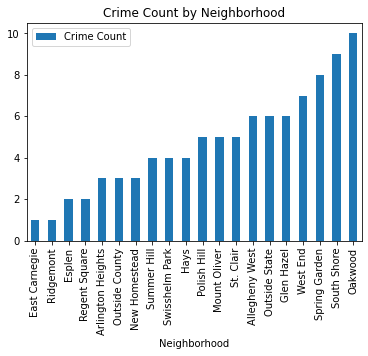

In [22]:
crime_count_bar = neighborhood_crime_data.iloc[:20].plot(kind='bar', x="Neighborhood", y="Crime Count", title="Crime Count by Neighborhood")


Now lets do the same with the average crime heirarchy.

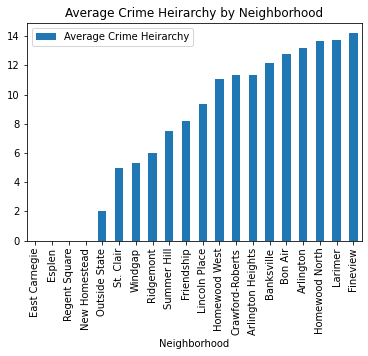

In [23]:
crime_heirarchy_data_sorted = neighborhood_crime_data.sort_values('Average Crime Heirarchy', ascending = True)
crime_heirarchy_bar = crime_heirarchy_data_sorted.iloc[:20].plot(kind='bar', x="Neighborhood", y="Average Crime Heirarchy", title="Average Crime Heirarchy by Neighborhood")

Now lets compare the two.

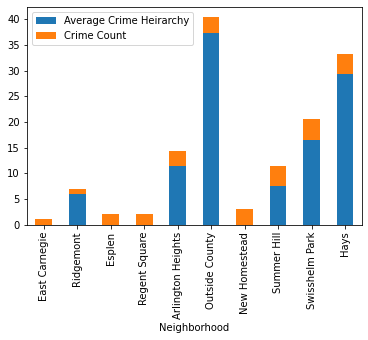

In [24]:
neighborhood_crime_data.iloc[0:10].plot.bar(stacked = True, x = "Neighborhood")


It looks like crime count and average crime heirarchy correlate pretty well. However, the average crime heirarchy is definitley a better gauge of safety.

Now, in order to come together and come to a conclusion about the best neighborhood for kids, each neighborhood must be ranked on a scale from 1 to 0, 1 being the most optimal neighborhood for each dataset.

Therefore, the goal now is to rank the neighborhoods on this scale, with 1 being the safest.

We can do this by finding the highest average crime heirarchy, subtracting it from each neighborhoos average, and then putting it over this max heirarchy value again.



In [25]:
# finding and setting the highest average crime heirarchy
maxValue = float(neighborhood_crime_data['Average Crime Heirarchy'].max())
print(maxValue)

56.8421052631579


We can see that the highest average crime heirarchy is 56.84, which is the max value we will be using to calculate the scores for each neighborhood.

Lets also add a column for this "overall score" to our data frame.

In [26]:
# adding overall score column
neighborhood_crime_data["Overall Score"] = 0
neighborhood_crime_data.head(5)

,Neighborhood,Average Crime Heirarchy,Crime Count,Overall Score
25,East Carnegie,0.000000,1,0
68,Ridgemont,6.000000,1,0
29,Esplen,0.000000,2,0
67,Regent Square,0.000000,2,0
4,Arlington Heights,11.333333,3,0


Now lets iterate through our data frame and set the overall score for each neighborhood.



In [27]:
for i, row in neighborhood_crime_data.iterrows():
    # calculating each neighborhoods overall score between 1 and 0
    overallScore = abs(float(row["Average Crime Heirarchy"]) - maxValue)/maxValue
    neighborhood_crime_data.at[i, "Overall Score"] = overallScore
    
neighborhood_crime_data.sort_values("Overall Score", ascending = False)

,Neighborhood,Average Crime Heirarchy,Crime Count,Overall Score
25,East Carnegie,0.000000,1,1.000000
29,Esplen,0.000000,2,1.000000
67,Regent Square,0.000000,2,1.000000
53,New Homestead,0.000000,3,1.000000
60,Outside State,2.000000,6,0.964815
...,...,...,...,...
51,Mount Oliver,43.000000,5,0.243519
20,Chateau,46.709677,31,0.178256
66,Polish Hill,47.400000,5,0.166111
64,Point Breeze,47.666667,21,0.161420


This overall score seems to be a representation of the average crime heirarchy, which means we did it right.

Now all we have to do is put this data into the shape file by assigning each value to it's specific neighborhood.

In [28]:
# iterating through both data frames to match each neighborhood
for i, row in neighborhood_map.iterrows():
    for j, data in neighborhood_crime_data.iterrows():
        if (row['hood'] == data['Neighborhood']):
            # adding all three data points for each neighborhood
            neighborhood_map.at[i,'Overall Score'] = data['Overall Score']
            neighborhood_map.at[i,'Average Crime Heirarchy'] = data['Average Crime Heirarchy']
            neighborhood_map.at[i,'Crime Count'] = data['Crime Count']

neighborhood_map = neighborhood_map.sort_values('Overall Score', ascending = False)

Now lets plot the data with our shape file. Lets start with crime count.

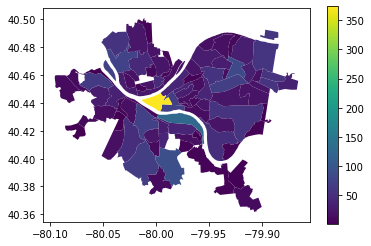

In [30]:
neighborhood_map.plot(column = "Crime Count", legend = True)

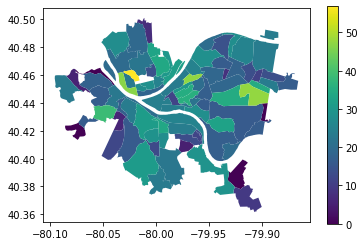

In [31]:
neighborhood_map.plot(column = "Average Crime Heirarchy", legend = True)

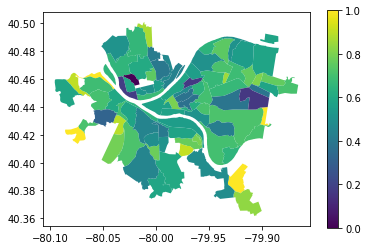

In [32]:
neighborhood_map.plot(column = "Overall Score", legend = True)

## Crime Conclusion:
Based off of our average crime heirarchy data, we can see that 4 neighborhoods seem to be the safest:

* East Carnegie
* New Homestead
* Esplen
* Regent Square

Again, if we wanted to get technical, we could say that East Carnegie is the safest as it has the lowest crime count out of the four. However, in order to ultimatelty find the best neighborhood for kids, the average crime heirarchy gives us the most information. Now that each neighborhood is given a score out of one, it can be used to get an overall score for each neighborhood based on my group members metrics as well. With that overall score, we'll be able to see which neighborhood is the best for kids.

# Best Schools in Pittsburgh


## By: Morgan Engel

Dataset: [ Schools in Pittsburgh Cities](https://data.wprdc.org/dataset/pittsburgh-public-schools-individualized-education-plan-iep/resource/62403582-e6c3-40b6-9bb6-d5d38e3f058d)

Our project is to determine which Pittsburgh neighborhood would be best for children.



I chose to see which neighborhoods had the best schools by looking into the percentage of gifted students that are enrolled in each school district, which would demonstrate the success that most students would have.

First, I imported everything needed and then read in the dataset

In [36]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
schools = pd.read_csv("neighborhood_iep.csv")
schools.head()

,neighborhoods,gifted,other_iep,not_iep_or_gifted,total_enrollment_k_12
0,"Allegheny Center, Allegheny West, California K...",12,89,250,351
1,"Allentown, Beltzhoover",15,148,366,529
2,"Banksville, Ridgemont, Oakwood, East Carnegie,...",24,70,436,530
3,Beechview,44,166,540,750
4,"Bloomfield, Friendship",43,50,198,291


In [37]:
schools['percentage_of_gifted'] = round((schools['gifted'] / schools['total_enrollment_k_12']) * 100, 2)
df = pd.DataFrame(schools).sort_values(by=['percentage_of_gifted'], ascending=False).set_index('neighborhoods')
df.head()

,gifted,other_iep,not_iep_or_gifted,total_enrollment_k_12,percentage_of_gifted
neighborhoods,,,,,
Squirrel Hill North,108,20,200,328,32.93
"Squirrel Hill South, Regent Square, Swisshelm Park",242,69,440,751,32.22
Point Breeze,97,32,177,306,31.70
Highland Park,83,45,254,382,21.73
Greenfield,85,59,327,471,18.05


My dataset came with a lot of neighborhoods combined in rows, so I had to split all the neighborhoods into their own rows. I did this by creating two lists with the neighborhoods and their corresponding gifted percentages and then converted them into their own dataset. This also filtered out all of the data that I didn't need anymore



In [38]:
neighborhood_list = []
gifted_list = []

for index, row in schools.iterrows():
    neighborhoods = row['neighborhoods']
    gifted = row['percentage_of_gifted']
    split = neighborhoods.split(", ")
    length = len(split)
    i = 0
    while i < len(split):
        neighborhood_list.append(split[i])
        gifted_list.append(gifted)
        i += 1
dictionary = {'Neighborhoods':neighborhood_list, 'Percentage_of_Gifted':gifted_list}
df2 = pd.DataFrame(dictionary, columns=['Neighborhoods', 'Percentage_of_Gifted']).sort_values(by=['Percentage_of_Gifted'], 
                    ascending=False).set_index('Neighborhoods')

df2

,Percentage_of_Gifted
Neighborhoods,
Squirrel Hill North,32.93
Swisshelm Park,32.22
Regent Square,32.22
Squirrel Hill South,32.22
Point Breeze,31.70
...,...
Sheraden,2.20
Hill District,2.20
Spring Hill,1.68


Next, I created a bar graph visual of the top 10 schools

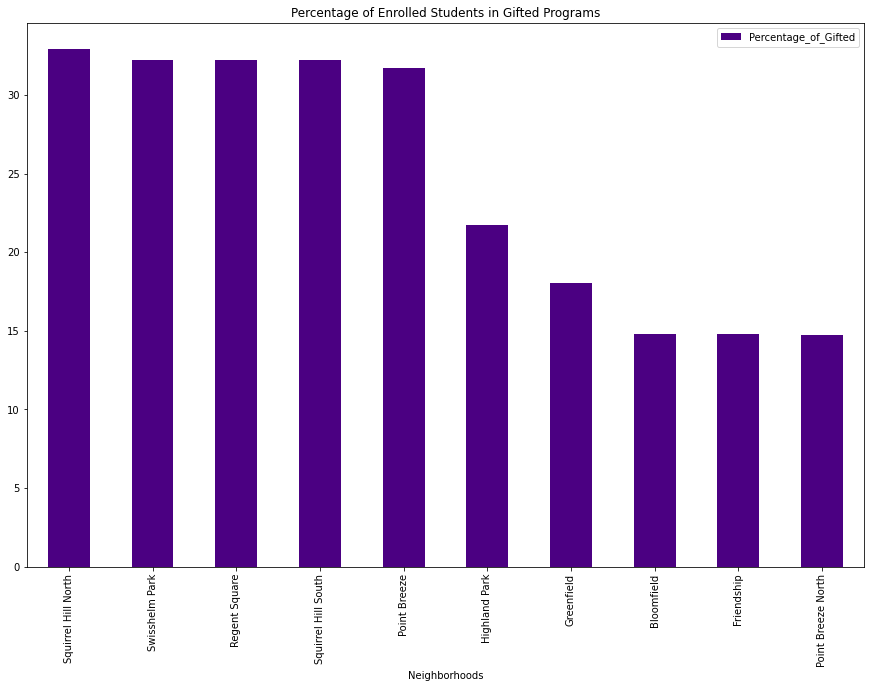

In [39]:
df2.head(10).plot.bar(title="Percentage of Enrolled Students in Gifted Programs", column='Percentage_of_Gifted', 
                      figsize=(15, 10), color='indigo')

I also created a color coded map to show the realtion that location has to the programs that the school offers

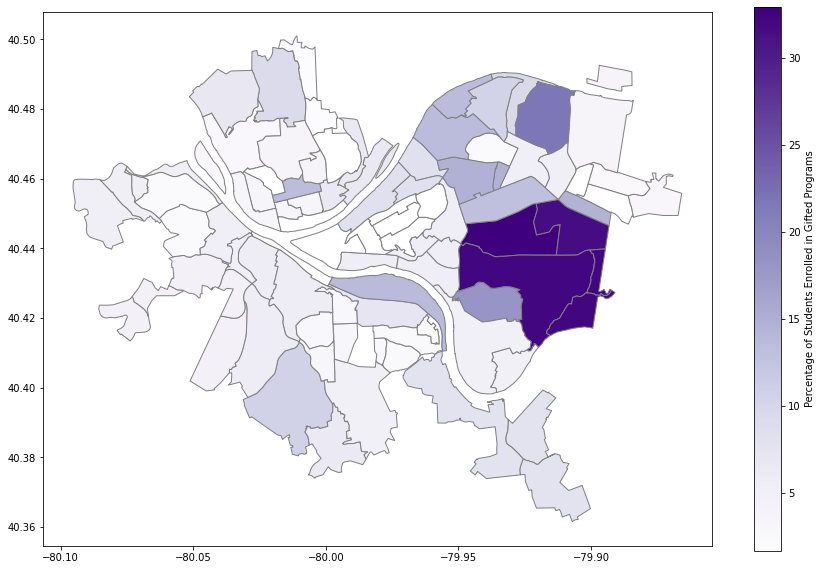

In [49]:
neighborhoods = geopandas.read_file("Neighborhoods.shp")
neighborhoods_map = neighborhoods.merge(df2, how='left', left_on='hood', right_on='Neighborhoods')
neighborhoods_map[['hood','Percentage_of_Gifted','geometry']].head()
neighborhoods_map.plot(column='Percentage_of_Gifted', cmap='Purples', edgecolor="gray", legend=True, 
                       legend_kwds={'label': "Percentage of Students Enrolled in Gifted Programs"}, 
                       figsize=(15, 10), missing_kwds={"color": "white"})

In [43]:
maxValue = df2.iloc[0,0]
for index, row in df2.iterrows():
    score = row["Percentage_of_Gifted"]/maxValue
    df2.at[index, "Overall_Score"] = round(score, 2)
df2

,Percentage_of_Gifted,Overall_Score
Neighborhoods,,
Squirrel Hill North,32.93,1.00
Swisshelm Park,32.22,0.98
Regent Square,32.22,0.98
Squirrel Hill South,32.22,0.98
Point Breeze,31.70,0.96
...,...,...
Sheraden,2.20,0.07
Hill District,2.20,0.07
Spring Hill,1.68,0.05


Seeing the ratings of the gifted students enrolled in each neighborhood, we can see that Squirrel Hill North has the best schools out of all the Pittsburgh neighborhoods, and is the best neighborhood to raise children in, according to the data from the schools. Following close behind is: Swisshelm Park, Regent Square, and Squirrel Hill South

Looking at the other data, we can see that Northview Heights, Summer Hill, and Spring Hill all have the lowest amount of students enrolled into their gifted programs in their school districts



In [44]:
for index, row in df2.iterrows():
    print(index + ": " + str(row['Overall_Score']))

Squirrel Hill North: 1.0
Swisshelm Park: 0.98
Regent Square: 0.98
Squirrel Hill South: 0.98
Point Breeze: 0.96
Highland Park: 0.66
Greenfield: 0.55
Bloomfield: 0.45
Friendship: 0.45
Point Breeze North: 0.45
South Side Flats: 0.42
Upper Lawrenceville: 0.41
Central Lawrenceville: 0.41
Central Northside: 0.41
Shadyside: 0.39
Brookline: 0.32
Stanton Heights: 0.32
Morningside: 0.29
Perry North: 0.28
Lower Lawrenceville: 0.25
Strip District: 0.25
Polish Hill: 0.25
New Homestead: 0.24
Hays: 0.24
Lincoln Place: 0.24
South Side Slopes: 0.22
Brighton Heights: 0.21
East Allegheny: 0.2
Spring Garden: 0.2
Troy Hill: 0.2
Overbrook: 0.2
Beechview: 0.18
Duquesne Heights: 0.17
Mount Washington: 0.17
West Oakland: 0.17
South Oakland: 0.17
North Oakland: 0.17
Central Oakland: 0.17
Bluff: 0.17
West End: 0.16
Elliott: 0.16
Larimer: 0.16
East Liberty: 0.16
Esplen: 0.15
Chartiers City: 0.15
Windgap: 0.15
Fairywood: 0.15
Carrick: 0.15
Glen Hazel: 0.14
Hazelwood: 0.14
East Carnegie: 0.14
Oakwood: 0.14
Westwood

## School conclusion

The best neighborhoods in pittsburgh according to schools is

* Squirrel Hill North

#  Parks in Pittsburgh Neighborhoods

#### by: Daphne Giffin

Dataset: [parks](https://data.wprdc.org/dataset/parks)

Our group is trying to find the best neighborhood in Pittsburgh for kids.

In this notebook I will analyze the number of parks in each neighborhood to see which neihborhood would be the most fun for kids that live there.

**First I start by doing all neccessary imports and reading in my neighborhood shp file and my data on the parks in Pittsburgh**

In [1]:
import pandas as pd
import geopandas
park_shape_data = geopandas.read_file("Mapdata.shp") #importing my park shp file
neighborhoods=geopandas.read_file("Neighborhoods.shp") #importing my neighborhood shape file 
park_data = pd.read_csv("Data.csv") #importing my park csv fil

**This is the first 9 rows of my data set for my analysis I only need to focus on the type and neighborhood. In the data set there is some non parks which I am not focusing on so I need to filter those out.**

In [2]:
park_data.head(9)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
5,223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416
6,1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852
7,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855
8,2049886968,Amber Triangle,Traffic Island/Median,2nd Division,NaN,East Liberty,7,8,42003111500,2,8,5,3-23,40.459099,-79.931846


**Then I filter my data to only have type and neighborhood. There are other types in my data set other than parks so I filter those out since I am only focusing on parks in my project**

In [3]:
park_df = park_data[park_data['type'] == "Park"][['type', 'neighborhood']]
most_frequent_neighborhoods = park_df.head(10)
print(most_frequent_neighborhoods)

    type               neighborhood
0   Park                  Beechview
1   Park           Crawford-Roberts
2   Park                North Shore
3   Park           Allegheny Center
4   Park                North Shore
5   Park  Central Business District
6   Park          Central Northside
7   Park                  Beechview
9   Park          Bedford Dwellings
10  Park          South Side Slopes


**Printing out the first 10 parks to see if my filtering out other types worked**

In [18]:
neighborhood_counts = park_df['neighborhood'].value_counts()
neighborhood_table = pd.DataFrame({'neighborhood': neighborhood_counts.index, 'count': neighborhood_counts.values})
neighborhood_table.head(10)

,neighborhood,count
0,Beechview,6
1,South Side Slopes,6
2,Troy Hill,5
3,Hazelwood,5
4,Mount Washington,5
5,Elliott,4
6,Sheraden,4
7,Marshall-Shadeland,4
8,East Liberty,4
9,Brighton Heights,3


**Next I create a bar plot the top 10 neighborhoods by the number of parks they have**

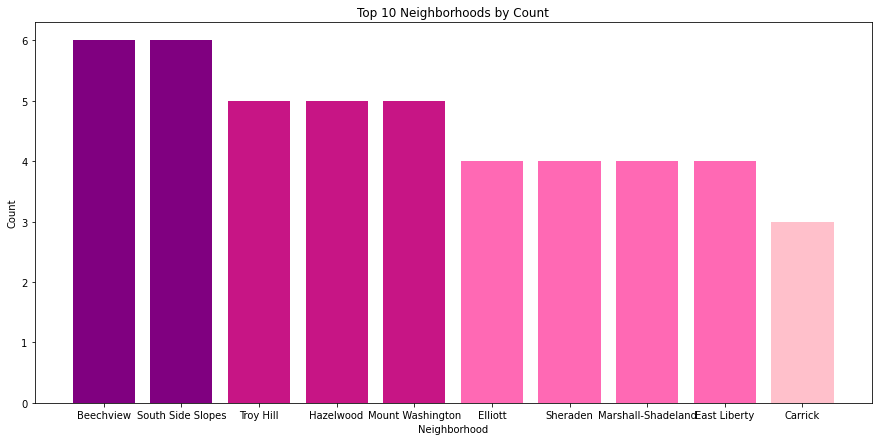

In [19]:
import matplotlib.pyplot as plt
neighborhood_table = neighborhood_table.sort_values(by='count', ascending=False).head(10)
colors = ['purple', 'purple', 'mediumvioletred', 'mediumvioletred', 'mediumvioletred', 'hotpink', 'hotpink', 'hotpink', 'hotpink', 'pink']
plt.figure(figsize=(15, 7))
plt.bar(neighborhood_table['neighborhood'], neighborhood_table['count'], color=colors)
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Top 10 Neighborhoods by Count')
plt.show()

**Then I created a color coded map so I can visually see which neighborhoods have the most parks**

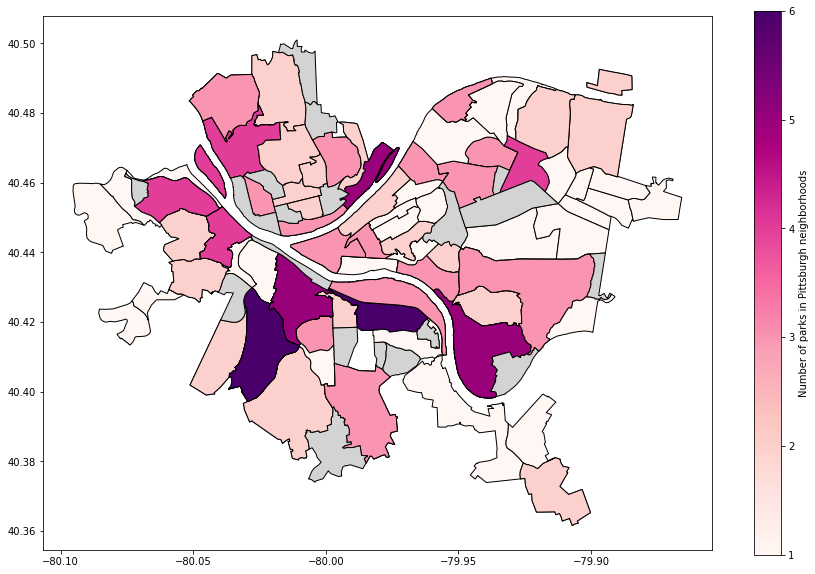

In [5]:
park_map = neighborhoods.merge(park_df, how='left', left_on='hood', right_on='neighborhood')
park_map['neighborhood_counts'] = park_map['hood'].map(neighborhood_counts)
park_map.plot(column='neighborhood_counts',
             cmap='RdPu',
             edgecolor='black',
             legend=True,
             legend_kwds={'label': 'Number of parks in Pittsburgh neighborhoods'},
             figsize=(15, 10),
             missing_kwds={'color': 'lightgrey'})

**Next I gave each neighborhood a score out of 1 so we can find the best data set using a formula and combine with the other data sets**

In [21]:
neighborhood_counts = park_df['neighborhood'].value_counts()
most_frequent_neighborhoods_df = pd.DataFrame({'neighborhood': neighborhood_counts.index, 'count': neighborhood_counts.values})
most_frequent_neighborhoods_df['score'] = most_frequent_neighborhoods_df['count'] / 6 
scores_list = most_frequent_neighborhoods_df['score'].tolist()
print("Scores by Neighborhood:")
for i, score in enumerate(scores_list):
    print(f" {most_frequent_neighborhoods_df['neighborhood'][i]}: {score:.2f}")

Scores by Neighborhood:
 Beechview: 1.00
 South Side Slopes: 1.00
 Troy Hill: 0.83
 Hazelwood: 0.83
 Mount Washington: 0.83
 Elliott: 0.67
 Sheraden: 0.67
 Marshall-Shadeland: 0.67
 East Liberty: 0.67
 Brighton Heights: 0.50
 Spring Hill-City View: 0.50
 Squirrel Hill South: 0.50
 Bloomfield: 0.50
 Garfield: 0.50
 North Shore: 0.50
 Crawford-Roberts: 0.50
 South Oakland: 0.50
 Carrick: 0.50
 Upper Lawrenceville: 0.50
 Manchester: 0.50
 Beltzhoover: 0.50
 Lower Lawrenceville: 0.50
 South Side Flats: 0.50
 Central Business District: 0.50
 Greenfield: 0.33
 Central Northside: 0.33
 Terrace Village: 0.33
 Perry North: 0.33
 Highland Park: 0.33
 Lincoln Place: 0.33
 Allentown: 0.33
 Fineview: 0.33
 Spring Garden: 0.33
 Strip District: 0.33
 Allegheny Center: 0.33
 Brookline: 0.33
 Banksville: 0.33
 Lincoln-Lemington-Belmar: 0.33
 Westwood: 0.33
 Perry South: 0.33
 Crafton Heights: 0.33
 Central Oakland: 0.33
 Swisshelm Park: 0.17
 Bluff: 0.17
 West Oakland: 0.17
 Bon Air: 0.17
 New Homestea

# Parks conclusion

The best neighborhoods in pittsburgh according to the number of parks are

* Beechview
* South Side Slopes

These two neighborhoods both have 6 parks which is the most out of all the neighborhoods in pittsburgh|

# Conclusion

In [50]:
# import pandas and geopandas
import pandas as pd
import geopandas as gpd

In [52]:
# read neighborhood shape file
neighborhood_map = gpd.read_file("Neighborhoods.shp")

In [54]:
# read final scores dataset
neighborhood_scores = pd.read_csv('finalScores.csv')

First, lets start off by checking out the data we all collected for each neighborhood based on each of our metrics.

In [55]:
neighborhood_scores.head(5)

,Neighborhood,Crime Overall Score,Park Overall Score,Education Overall Score
25,East Carnegie,1.000000,0.17,0.14
68,Ridgemont,0.894444,0.00,0.14
29,Esplen,1.000000,0.17,0.15
67,Regent Square,1.000000,0.00,0.98
4,Arlington Heights,0.800617,0.00,0.08


As we can see, we have an overall crime, park, and education score for each neighborhood, all on a scale of 1.

Now all we have to do is use this data to find an average overall score for each neighborhood. Lets add this data directly into our shape file.

In [56]:
neighborhood_map['Crime Overall Score'] = 0
neighborhood_map['Park Overall Score'] = 0
neighborhood_map['Education Overall Score'] = 0
neighborhood_map['Neighborhood Overall Score'] = 0

# iterating through both data frames to match each neighborhood
for i, row in neighborhood_map.iterrows():
    for j, scores in neighborhood_scores.iterrows():
        if (row['hood'] == scores['Neighborhood']):
            # adding all three data points for each neighborhood
            neighborhood_map.at[i,'Crime Overall Score'] = float(scores['Crime Overall Score'])
            neighborhood_map.at[i,'Park Overall Score'] = float(scores['Park Overall Score'])
            neighborhood_map.at[i,'Education Overall Score'] = float(scores['Education Overall Score'])
            neighborhood_map.at[i,'Neighborhood Overall Score'] = float((scores['Crime Overall Score'] + scores['Park Overall Score'] + scores['Education Overall Score'])/3.0)

neighborhood_map = neighborhood_map.sort_values('Neighborhood Overall Score', ascending = False)
neighborhood_map.head(5)


,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,temp,pghdb_sde_Neighborhood_2010_are,GlobalID,Shape__Area,Shape__Length,geometry,Crime Overall Score,Park Overall Score,Education Overall Score,Neighborhood Overall Score
85,86,215,42,003,141000,1,420031410001,Block Group 1,G5030,S,...,None,5362860.0,93ce438e-e3ec-410d-a7fd-619646e25dc3,5.362506e+06,16007.508980,"POLYGON ((-79.89709 40.42765, -79.89661 40.427...",1.000000,0.00,0.98,0.660000
72,73,97,42,003,191600,3,420031916003,Block Group 3,G5030,S,...,None,40706528.0,5f560b22-ffcc-4d10-ac52-3b39c857ec89,4.070881e+07,32690.828072,"POLYGON ((-80.02121 40.42342, -80.02111 40.423...",0.717463,1.00,0.18,0.632488
82,83,83,42,003,141100,1,420031411001,Block Group 1,G5030,S,...,None,13379806.0,bf45c180-f5c3-4f36-832a-183412108101,1.337930e+07,20794.440321,"POLYGON ((-79.89143 40.42685, -79.89192 40.426...",0.709722,0.17,0.98,0.619907
48,49,20,42,003,170600,1,420031706001,Block Group 1,G5030,S,...,None,19973024.0,74096afd-885d-464c-abee-49aef0c9f890,1.997303e+07,26531.351487,"POLYGON ((-79.99713 40.42920, -79.99547 40.428...",0.580417,1.00,0.22,0.600139
60,61,34,42,003,562900,1,420035629001,Block Group 1,G5030,S,...,None,44132028.0,c30655c8-cf46-4785-88c0-33dc03480284,4.413395e+07,42027.688431,"POLYGON ((-79.95505 40.42713, -79.95498 40.427...",0.700222,0.83,0.14,0.556741



We now have each neighborhoods overall score, as well as their scores for each individual metric.

Since this data is hard to read, lets get our final scores into a seperate data frame.


In [57]:
neighborhood_final_scores = neighborhood_map[['hood','Neighborhood Overall Score','Park Overall Score','Crime Overall Score','Education Overall Score']]
neighborhood_final_scores = neighborhood_final_scores.rename(columns = {'hood':'Neighborhood'})
neighborhood_final_scores = neighborhood_final_scores.sort_values('Neighborhood Overall Score',ascending = False)
neighborhood_final_scores.head(5)

,Neighborhood,Neighborhood Overall Score,Park Overall Score,Crime Overall Score,Education Overall Score
85,Regent Square,0.660000,0.00,1.000000,0.98
72,Beechview,0.632488,1.00,0.717463,0.18
82,Swisshelm Park,0.619907,0.17,0.709722,0.98
48,South Side Slopes,0.600139,1.00,0.580417,0.22
60,Hazelwood,0.556741,0.83,0.700222,0.14


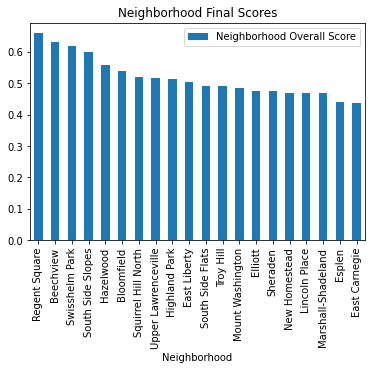

In [58]:
final_scores_bar = neighborhood_final_scores.iloc[:20].plot(kind='bar', x="Neighborhood", y="Neighborhood Overall Score", title="Neighborhood Final Scores")


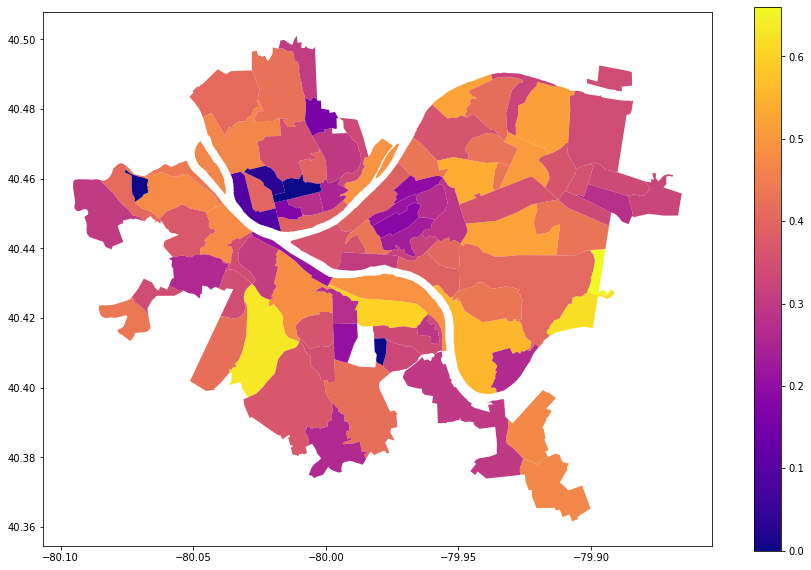

In [59]:
neighborhood_map.plot(column='Neighborhood Overall Score', legend = True, figsize =(15,10), cmap = "plasma")


# Regent Square is the best Pittsburgh neighborhood for kids!


#### Regent Square had an overall score of 0.66, with submetric overall scores:

* Crime Score: 1.00
* Park Score: 0
* Education Score: 0.98

If you care a lot about parks however...
#### A close second was Beechview with an overall score of 0.63, and submetric overall scores:

* Crime Score: 0.72
* Park Score: 1
* Education Score: 0.18
